## Chapter 11: Rootfinding

A **root** of a function $f(x)$ is a number $x^{\star}$ such that $f(x^{\star})=0$.

For example, if $f(x)=x^2-4x+3$, then $x=1$ is a root because $f(1)=0$

With some functions (linear, quadratic), we can find the roots using standard mathematical techniques, however, in many cases, say if $g(x) = x \cos x$, we can't. 

This chapter goes over approximations to roots, errors and how to find roots.

### 11.1 Absolute and Relative Errors

Consider some algorithm tries to find the value $x^{\star}$.  If the actual value that the algorithm returns is $x$, there there is an error.  The **absolute error** is defined as

$$|x-x^{\star}|$$

and the **relative error** is 

$$\left|\frac{x-x^{\star}}{x^{\star}}\right|$$

Also, the **percent error** is often used as well and it is the relative error times 100.

Consider the example if $x^{\star} = 0.150$ and $x=0.153$, find the absolute, relative and percent error.

In [ ]:
xstar = 0.150
x = 0.153
abs(x-xstar)

In [ ]:
abs((x-xstar)/xstar)

In [ ]:
100*abs((x-xstar)/xstar)

To simplify things in this chapter we will define:

In [ ]:
absErr(x::Real,xstar::Real) = abs(x-xstar)
relErr(x::Real,xstar::Real) = abs((x-xstar)/xstar)

In [ ]:
absErr(0.153,0.15)

In [ ]:
relErr(0.153,0.15)

In [ ]:
100*relErr(0.153,0.15)

### 11.2 Errors in the Quadratic Formula

Consider a quadratic function $q(x)=ax^2+bx+c$, we know that the quadratic formula:

$$x=\frac{-b \pm \sqrt{b^{2}-4ac} } {2a}$$

returns the roots of $q(x)$

A simple function that solves this is:

In [ ]:
function quad(a::Real,b::Real,c::Real)
  d=sqrt(b^2-4*a*c)
  (-b+d)/(2*a),(-b-d)/(2*a)
end

Let's use this to solve $12.242x^2+42.382x+0.0012=0$ using the quadratic formula

In [ ]:
x64a,x64b = quad(12.242,42.382,0.0012)

If instead we used 16-bit floating point numbers then

In [ ]:
x16a,x16b = quad(Float16(12.242),Float16(42.382),Float16(0.0012))

If we assume that 64-bit roots are exact and the 16-bit roots are approximations, then the absolute errors are:

In [ ]:
absErr(x16a,x64a),absErr(x16b,x64b)

And the relative errors are:

In [ ]:
relErr(x16a,x64a),relErr(x16b,x64b)

What happened?   In the example of the quadratic formula: $12.242x^2+42.382x+0.0012=0$, then $b=42.382$ and $\sqrt{b^2-4ac}$ is

Is very close to $b$ so we they are subtracted you get round off.

#### Exercise
Find the solution to $12.242x^2+42.382x+0.0012=0$ using BigFloats and treat them like exact values.  What are the relative errors of the 64-bit versions?

### 11.3: Revisting the Quadratic Equation

Does the above example mean that we can't use the quadratic equation?  Well, no.  Here's how we can rewrite the quadratic.

Assume that $b>0$, then root from the quadratic formula that is most problematic is:

$$\frac{-b+\sqrt{b^2-4ac}}{2a}$$

We can rearrange this to switch to an addition problem.

In [ ]:
function quad2(a::Real,b::Real,c::Real)

end

In [ ]:
x64c,x64d = quad2(12.242,42.382,0.12)

In [ ]:
x16c,x16d = quad2(Float16(12.24),Float16(42.382),Float16(0.12))

In [ ]:
absErr(x16c,x64c),absErr(x16d,x64d)

In [ ]:
relErr(x16c,x64c),relErr(x16d,x64d)

Note that the first solution is quite close, but this time the second one has error of about 11%.

In your homework, you will write a function that chooses which of the two quadratic formulas to select to get a good result.

### Searching for roots of functions that are hard to find:

In [15]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

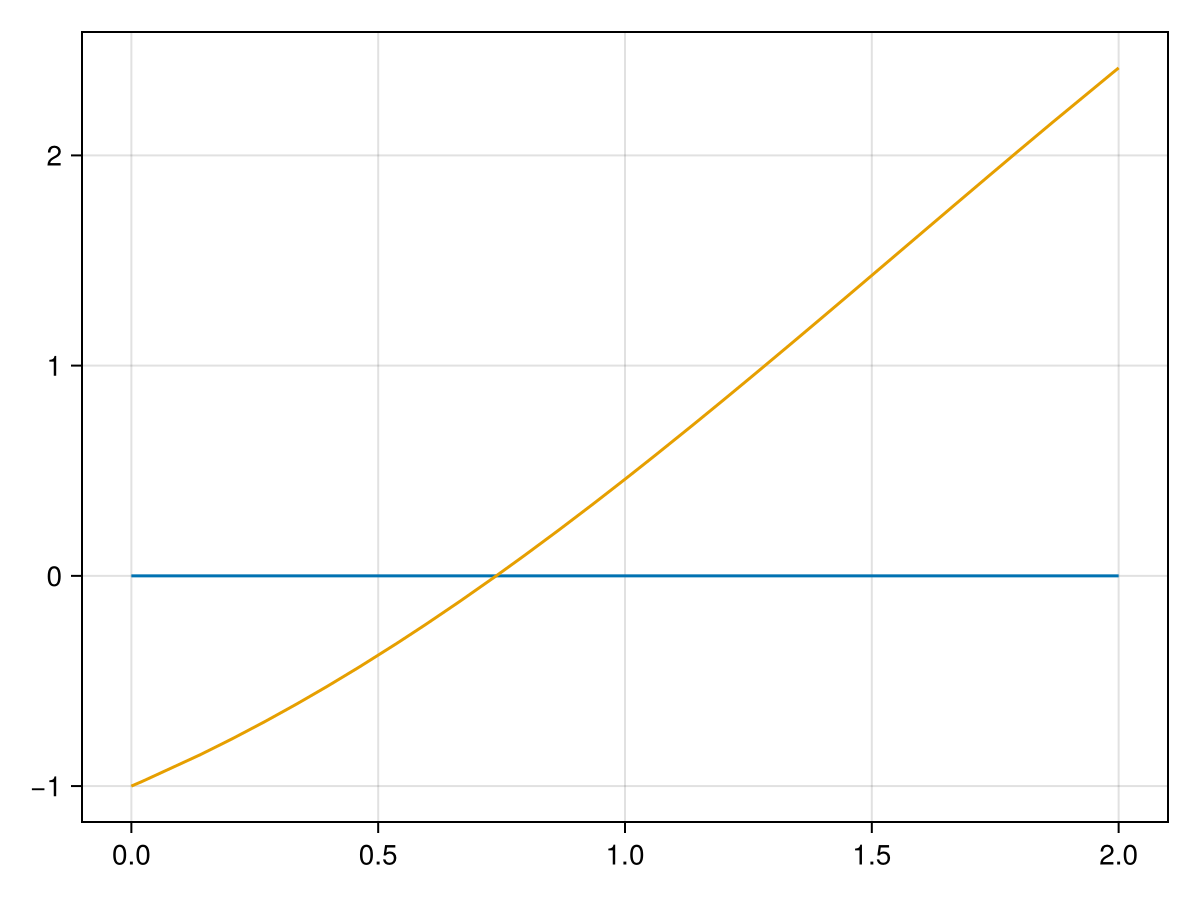

In [16]:
fig, ax = lines(0..2, x->0)
lines!(ax,0..2, x->x-cos(x))
fig

In [17]:
function bisect(f::Function,a::Real,b::Real)
  local mid = 0.5*(a+b)  # find the midpoint
  abs(b-a) < 1e-6 ?  mid : (f(a)*f(mid) < 0  ? bisect(f,a,mid) : bisect(f,mid,b) )
end

bisect (generic function with 1 method)

In [18]:
bisect(x->x-cos(x),0,2)

0.7390847206115723

### 11.4: Newton's method

Newton's method is a common method used to find roots of equations.  You probably saw Newton's method in Calculus and the idea is to approximate the root by using the tangent line (and finding the root).  This is repeatedly done.  In short, this results in the following iterative formula:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

We can write this as a julia function with:

In [19]:
function newton(f::Function, df::Function, x0::Real)
  dx = -f(x0)/df(x0)
  while abs(dx) > 1e-6
    x0 += dx
    dx = -f(x0)/df(x0)
  end
  x0 + dx
end

newton (generic function with 2 methods)

Find all roots of the function $f(x)=15x^3-143x^2+226x+280$

In [20]:
f(x::Real) = 15x^3-143x^2+226x+280
df(x::Real) = 45x^2-286x+226

df (generic function with 1 method)

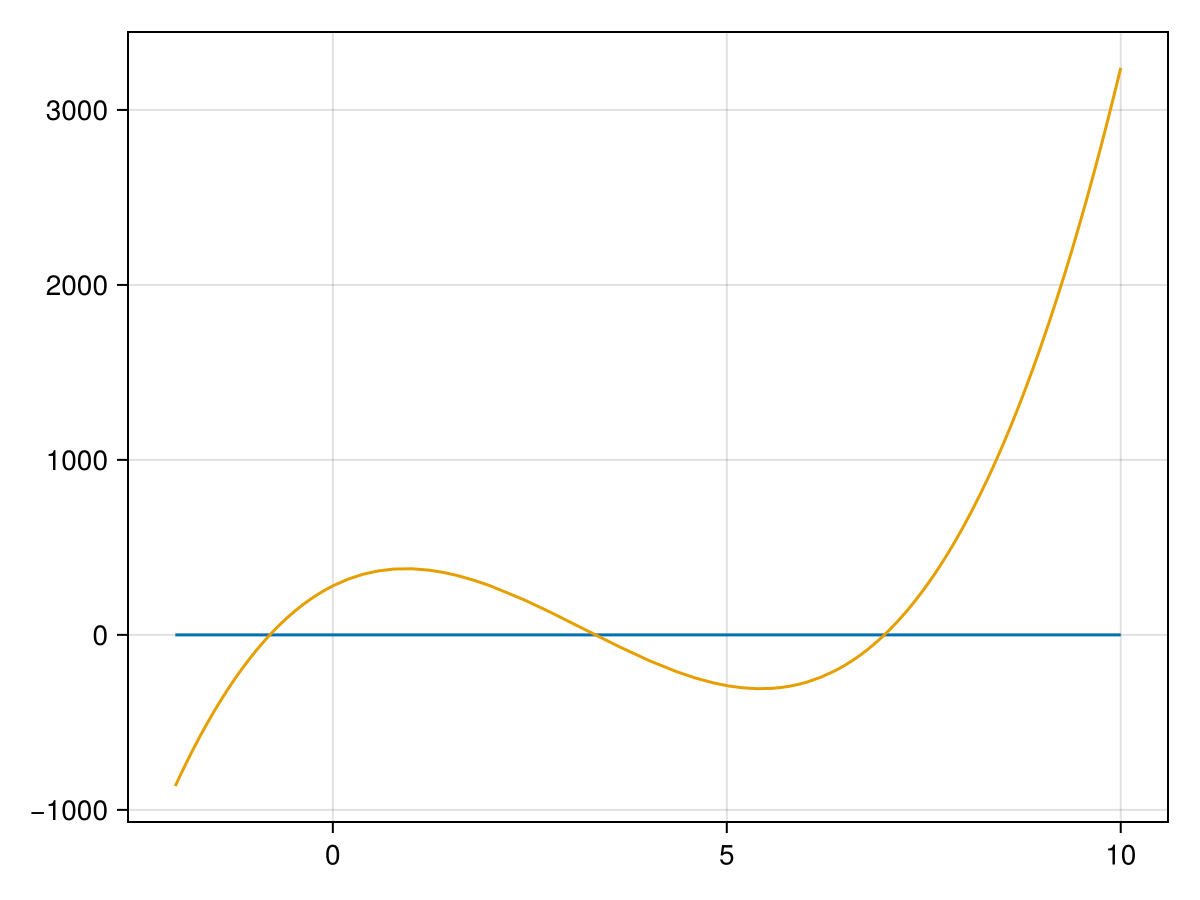

In [21]:
fig, ax = lines(-2..10, x->0)
lines!(ax,-2..10, f)
fig

#### Exercise
Find the other two roots of $f(x)$.

In [22]:
newton(f,df,-1), newton(f,df,3), newton(f,df,6)

(-0.8, 3.333333333333334, 7.000000000000001)

### 11.4.2: Automatic Differentiation

It's a bit of a pain to have to put in the derivative as well.  Fortunately, there is a nice technique called **automatic differentiation** to find the exact value of derivative at a point.  It's not symbolic differentiation, which would generate a function, but it works perfectly for Newton's method.  Here's how this works. 

First, add the `ForwardDiff` package if you haven't

In [23]:
using ForwardDiff

In [24]:
ForwardDiff.derivative(x->x^2,3)

6

In [25]:
h(x)=exp(x^2+cos(sqrt(x)))

h (generic function with 1 method)

In [26]:
ForwardDiff.derivative(h,0.5)

1.4847374790394043

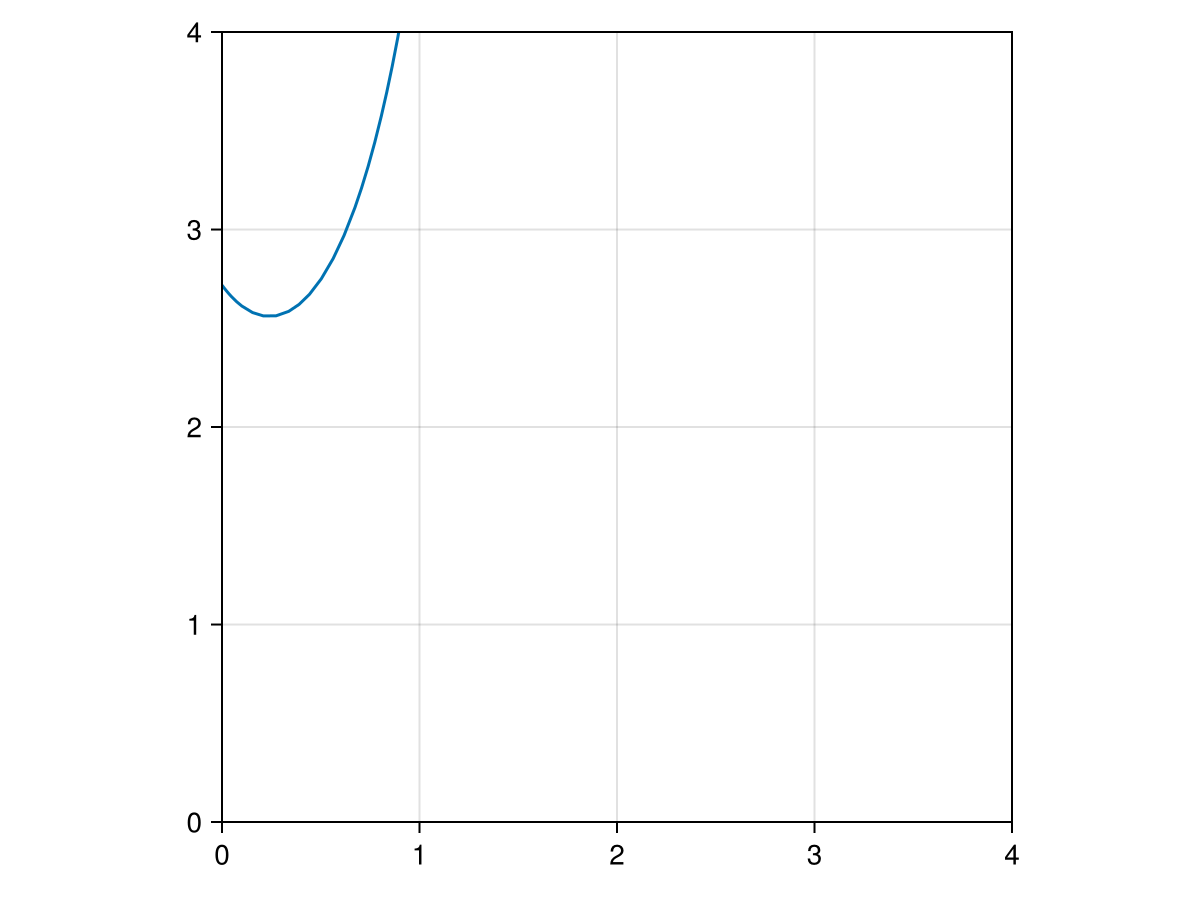

In [31]:
fig = Figure()
ax = Axis(fig[1,1], aspect = 1, limits = (0,4,0,4))
lines!(-2..1.5,h)
fig

Using an aspect ratio of 1, you can see that the derivative at $x=0.5$ seems to be about 1.5 (slope of a tangent line)

#### Exercise
Find $g'(-\pi/4)$ if 
$$g(x) = \frac{x^2}{\sqrt{1+e^{\cos x}}}$$

### Adding Automatic Differentiation to Newton's method

In [1]:
function newton(f::Function, x0::Real)
    dx = -f(x0)/ForwardDiff.derivative(f,x0)
    while abs(dx) > 1e-6
      x0 += dx
      dx = -f(x0)/ForwardDiff.derivative(f,x0)
    end
    x0 + dx
end

newton (generic function with 1 method)

Find all three roots of

In [21]:
newton(f,-2),newton(f,3),newton(f,5)

(-0.8000000000000008, 3.333333333333334, 6.999999999999997)

#### Exercise
 - Find the smallest positive value of $x$ where $\tan x = x$.
 - Run Newton's method on $f(x)=x^2+2$.  What happened?

In [35]:
g(x) = tan(x)-x
newton(g,4.5)

4.493409457909247

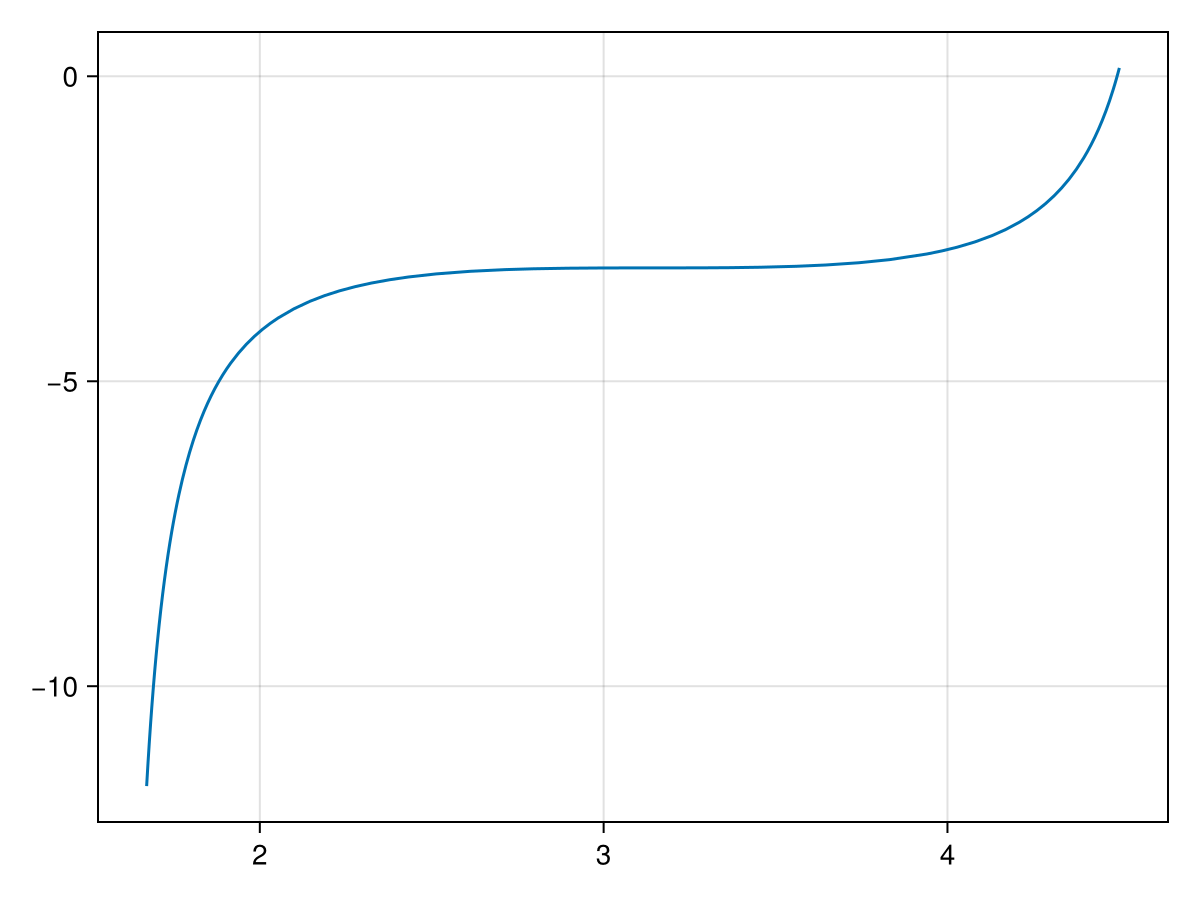

In [34]:
lines(pi/2+0.1..4.5,x->tan(x)-x)

In [ ]:
newton(x->x^2+2, 1)

We need to fix the second problem, which is an infinte loop.  In the while loop, we need to have a max number of steps.  Let's say 10.

In [2]:
function newton(f::Function, x0::Real)
    local dx = -f(x0)/ForwardDiff.derivative(f,x0)
    local n = 0  # number of steps
    while abs(dx) > 1e-6 && n < 10 
      x0 += dx
      dx = -f(x0)/ForwardDiff.derivative(f,x0)
      n += 1
    end
    x0 + dx
end

newton (generic function with 1 method)

In [6]:
newton(x->x^2+2,0.1)

-22.94049993013629

Note: this still isn't great.  If one runs the `newton` function, then a number is returned.  How does one know if this is accurate or just stopped due to the maximum number of steps.  

Let's rewrite this with the `error` function that is called if the max number of steps is called. 

In [7]:
function newton(f::Function, x0::Real)
    local dx = -f(x0)/ForwardDiff.derivative(f,x0)
    local n = 0  # number of steps
    while abs(dx) > 1e-6 && n < 10 
      x0 += dx
      dx = -f(x0)/ForwardDiff.derivative(f,x0)
      n += 1
    end
    if n == 10
        error("You have reached the maximum number of steps")
    end
    x0 + dx
end

newton (generic function with 1 method)

In [8]:
newton(x->x^2+1,0.1)

ErrorException: You have reached the maximum number of steps

Note: This is better but not great.  Do we want this to just stop--that's what an error signifies? We will create a new Data Type that handles this in a better and we will later see how to make and throw Exceptions. 

In [9]:
newton(x->x^2-2,1)

1.4142135623730951